## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/weather_forecasting/Chinese_weather.csv")
data.columns = data.columns.str.lstrip()
data.columns = data.columns.str.rstrip()
data.index = pd.to_datetime(data['datetime_utc'])
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


## Data analysis & Preprocessing

#### Analysis

In [4]:
print(f"Number of lignes  : {data.shape[0]}")
print(f"Number of features  : {data.shape[1]}")
print(f"Number of NaN values : {data.isna().sum()}")

Number of lignes  : 100990
Number of features  : 20
Number of NaN values : datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
dtype: int64


In [5]:
features = ['_dewptm','_fog','_hail','_hum','_rain','_snow','_tempm','_thunder','_tornado']

In [6]:
data = data[features]
data.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [7]:
cols = ['_fog','_hail','_rain','_snow','_thunder','_tornado']
for col in cols:
    print(col,"-----> ",np.unique(data[col],return_counts=True))

_fog ----->  (array([0, 1]), array([93952,  7038]))
_hail ----->  (array([0, 1]), array([100977,     13]))
_rain ----->  (array([0, 1]), array([98338,  2652]))
_snow ----->  (array([0, 1]), array([100989,      1]))
_thunder ----->  (array([0, 1]), array([100038,    952]))
_tornado ----->  (array([0, 1]), array([100988,      2]))


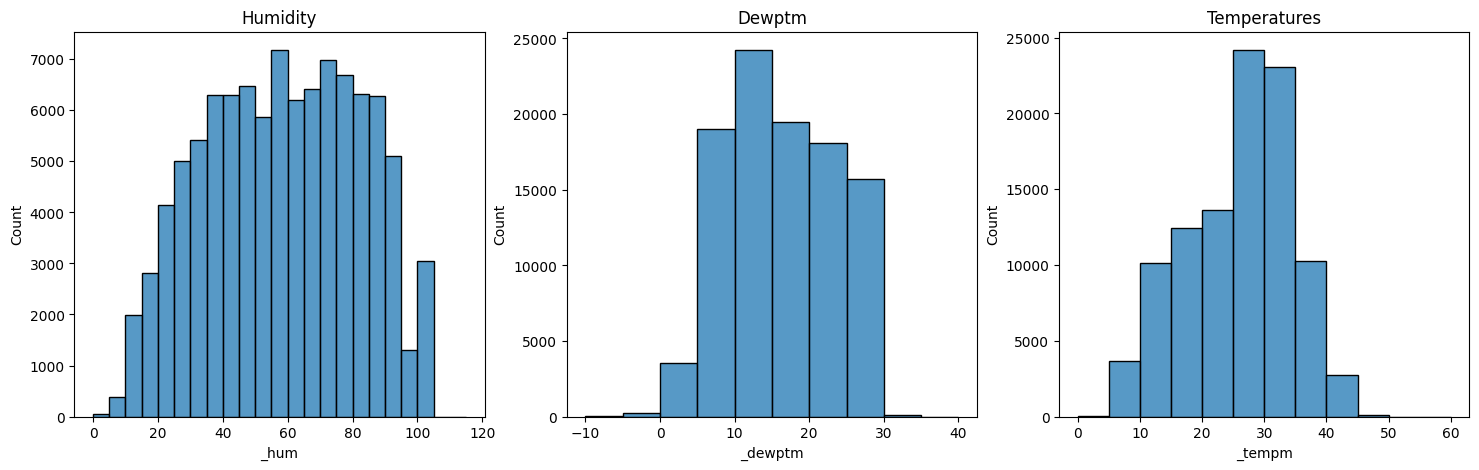

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

ax[0].set_title("Humidity")
sns.histplot(ax=ax[0], data=data['_hum'], bins=[i for i in range(0, 120, 5)])

ax[1].set_title("Dewptm")
sns.histplot(ax=ax[1], data=data['_dewptm'], bins=[i for i in range(-10, 41, 5)])

ax[2].set_title("Temperatures")
sns.histplot(ax=ax[2], data=data['_tempm'], bins=[i for i in range(0, 61, 5)])

plt.show()


In [9]:
data.isna().sum()

_dewptm     621
_fog          0
_hail         0
_hum        757
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [10]:
data = data.interpolate(method="ffill")
data.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [11]:
data.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [12]:
data.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


# Temperature forecast

In [13]:
target_feature = '_tempm'
target_indice = np.argmax(np.where((data.columns == target_feature),1,0))

In [14]:
dates = data.index

#### Preprocessing

In [15]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
data_norm = mm_scaler.fit_transform(data)
print(data_norm[0])

[0.33333333 0.         0.         0.09623431 0.         0.
 0.3258427  0.         0.        ]


In [16]:
num_features = data_norm.shape[1]
# hyperparameter
seq_length = 10

In [17]:
def create_sequences(data_norm,target_indice):

    sequences = []
    labels = []

    for seq in range(0,data_norm.shape[0] - seq_length):

        sequences.append(data_norm[seq:seq+seq_length])

        labels.append(data_norm[seq+seq_length][target_indice])

    return np.array(sequences),np.array(labels)

In [18]:
sequences , labels = create_sequences(data_norm,target_indice)

train_split = int(sequences.shape[0]*0.8)

sequences_train , sequences_test = sequences[:train_split] , sequences[train_split:]
labels_train , labels_test = labels[:train_split] , labels[train_split:]

print(f"Sequences of train set : {sequences_train.shape}")
print(f"Sequences of test set : {sequences_test.shape}")
print(f"Labels of train set : {labels_train.shape}")
print(f"Labels of test set : {labels_test.shape}")

Sequences of train set : (80784, 10, 9)
Sequences of test set : (20196, 10, 9)
Labels of train set : (80784,)
Labels of test set : (20196,)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

model = Sequential()

model.add(LSTM(128,input_shape=(sequences_train.shape[1],sequences_train.shape[2]) , return_sequences=True ))
model.add(Dropout(0.2))

model.add(LSTM(64,return_sequences=True ))
model.add(Dropout(0.2))

model.add(LSTM(32,return_sequences=False ))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           70656     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [21]:
early_stopping = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/weather_forecasting/best_model_temp.h5',
  monitor='val_loss',save_best_model_only=True
)

history = model.fit(
    sequences_train , labels_train,
    epochs=30,batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/30
1010/1010 [==============================] - 21s 11ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 2/30
  16/1010 [..............................] - ETA: 7s - loss: 0.0012

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1010/1010 [==============================] - 10s 10ms/step - loss: 8.6254e-04 - val_loss: 0.0017
Epoch 3/30
1010/1010 [==============================] - 9s 9ms/step - loss: 6.4208e-04 - val_loss: 0.0016
Epoch 4/30
1010/1010 [==============================] - 10s 10ms/step - loss: 5.6665e-04 - val_loss: 0.0015
Epoch 5/30
1010/1010 [==============================] - 11s 10ms/step - loss: 5.4853e-04 - val_loss: 0.0015
Epoch 6/30
1010/1010 [==============================] - 10s 10ms/step - loss: 5.3347e-04 - val_loss: 0.0015
Epoch 7/30
1010/1010 [==============================] - 11s 11ms/step - loss: 5.2061e-04 - val_loss: 0.0014
Epoch 8/30
1010/1010 [==============================] - 10s 10ms/step - loss: 5.1614e-04 - val_loss: 0.0014
Epoch 9/30
1010/1010 [==============================] - 10s 10ms/step - loss: 4.9688e-04 - val_loss: 0.0014
Epoch 10/30
1010/1010 [==============================] - 10s 10ms/step - loss: 4.9845e-04 - val_loss: 0.0014
Epoch 11/30
1010/1010 [=================

In [22]:
import tensorflow as tf
best_model = tf.keras.models.load_model('/content/drive/MyDrive/weather_forecasting/best_model_temp.h5')
test_loss = best_model.evaluate(sequences_test,labels_test)
print(f"Test Loss : {test_loss:.4f}")

632/632 [==============================] - 4s 4ms/step - loss: 7.0955e-04
Test Loss : 0.0007


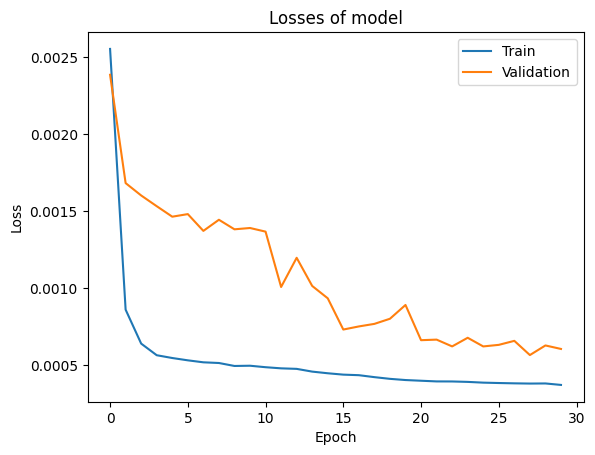

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Losses of model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error as MAE , mean_squared_error as MSE , mean_absolute_percentage_error as MAPE

predictions = best_model.predict(sequences_test)

print(f"MSE : {MSE(predictions,labels_test)}")
print(f"MAE : {MAE(predictions,labels_test)}")
print(f"MAPE : {MAPE(predictions,labels_test)}")

632/632 [==============================] - 3s 4ms/step
MSE : 0.0007095454550684738
MAE : 0.018215540915018372
MAPE : 0.07833301270851574


In [25]:
# from (-1,1) --> (-1,9) by duplicating the temperatures for the 9 features
dupli_labels = np.repeat(labels_test.reshape(-1,1) , sequences_test.shape[-1] , axis=1)
# the original temperatures (not normalized)
truth_temp = mm_scaler.inverse_transform(dupli_labels)[:,target_indice]


dupli_predictions = np.repeat(predictions,9,axis=-1)
predicted_temp = mm_scaler.inverse_transform(dupli_predictions)[:,target_indice]

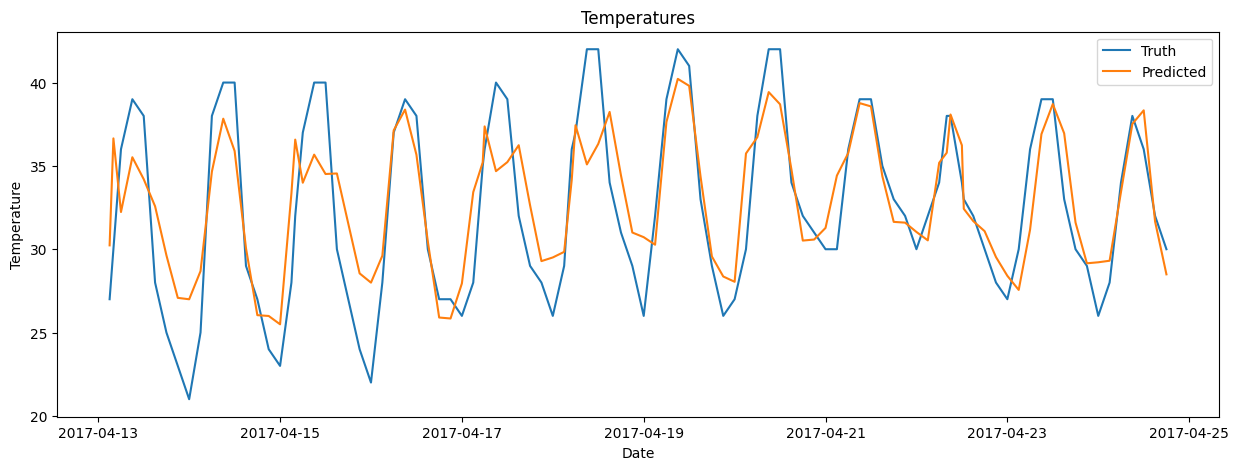

In [26]:
plt.figure(figsize=(15,5))
plt.plot(dates[-100:],truth_temp[-100:],label="Truth")
plt.plot(dates[-100:],predicted_temp[-100:],label="Predicted")
plt.title("Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Humidity forecast

In [27]:
target_feature = '_hum'
target_indice = np.argmax(np.where((data.columns == target_feature),1,0))

In [28]:
# make daily data ( group by day)
data_avg = data.resample('D').mean()
data_avg.isna().sum()

_dewptm     141
_fog        141
_hail       141
_hum        141
_rain       141
_snow       141
_tempm      141
_thunder    141
_tornado    141
dtype: int64

In [29]:
data_avg = data_avg.interpolate(method='ffill')
data_avg.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [30]:
data_avg.head(6)

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0
1996-11-06,9.062500,0.0,0.0,47.875000,0.0,0.0,21.937500,0.0,0.0


In [31]:
dates = data_avg.index
dates

DatetimeIndex(['1996-11-01', '1996-11-02', '1996-11-03', '1996-11-04',
               '1996-11-05', '1996-11-06', '1996-11-07', '1996-11-08',
               '1996-11-09', '1996-11-10',
               ...
               '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22',
               '2017-04-23', '2017-04-24'],
              dtype='datetime64[ns]', name='datetime_utc', length=7480, freq='D')

In [32]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
data_norm = mm_scaler.fit_transform(data_avg)
print(data_norm[0])

[0.44471154 0.         0.         0.47392924 0.         0.
 0.46387643 0.         0.        ]


In [33]:
num_features = data_norm.shape[1]
# hyperparameter
seq_length = 10

In [34]:
sequences , labels = create_sequences(data_norm,target_indice)

train_split = int(sequences.shape[0]*0.8)

sequences_train , sequences_test = sequences[:train_split] , sequences[train_split:]
labels_train , labels_test = labels[:train_split] , labels[train_split:]

print(f"Sequences of train set : {sequences_train.shape}")
print(f"Sequences of test set : {sequences_test.shape}")
print(f"Labels of train set : {labels_train.shape}")
print(f"Labels of test set : {labels_test.shape}")

Sequences of train set : (5976, 10, 9)
Sequences of test set : (1494, 10, 9)
Labels of train set : (5976,)
Labels of test set : (1494,)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

model = Sequential()

model.add(LSTM(128,input_shape=(sequences_train.shape[1],sequences_train.shape[2]) , return_sequences=True ))
model.add(Dropout(0.2))

model.add(LSTM(64,return_sequences=True ))
model.add(Dropout(0.2))

model.add(LSTM(32,return_sequences=False ))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

In [36]:
early_stopping = EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/weather_forecasting/best_model_hum.h5',
  monitor='val_loss',save_best_model_only=True
)

history = model.fit(
    sequences_train , labels_train,
    epochs=40,batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/40
75/75 [==============================] - 11s 27ms/step - loss: 0.0397 - val_loss: 0.0150
Epoch 2/40
10/75 [===>..........................] - ETA: 0s - loss: 0.0214

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 1s 15ms/step - loss: 0.0204 - val_loss: 0.0154
Epoch 3/40
75/75 [==============================] - 1s 14ms/step - loss: 0.0187 - val_loss: 0.0138
Epoch 4/40
75/75 [==============================] - 1s 14ms/step - loss: 0.0178 - val_loss: 0.0125
Epoch 5/40
75/75 [==============================] - 1s 14ms/step - loss: 0.0165 - val_loss: 0.0120
Epoch 6/40
75/75 [==============================] - 1s 13ms/step - loss: 0.0158 - val_loss: 0.0119
Epoch 7/40
75/75 [==============================] - 1s 11ms/step - loss: 0.0146 - val_loss: 0.0124
Epoch 8/40
75/75 [==============================] - 1s 10ms/step - loss: 0.0136 - val_loss: 0.0094
Epoch 9/40
75/75 [==============================] - 1s 10ms/step - loss: 0.0124 - val_loss: 0.0101
Epoch 10/40
75/75 [==============================] - 1s 10ms/step - loss: 0.0117 - val_loss: 0.0082
Epoch 11/40
75/75 [==============================] - 1s 10ms/step - loss: 0.0116 - val_loss: 0.0081
Epoch 12/40
75/75 [

In [39]:
import tensorflow as tf
best_model = tf.keras.models.load_model('/content/drive/MyDrive/weather_forecasting/best_model_hum.h5')
test_loss = best_model.evaluate(sequences_test,labels_test)
print(f"Test Loss : {test_loss:.4f}")

47/47 [==============================] - 2s 4ms/step - loss: 0.0070
Test Loss : 0.0070


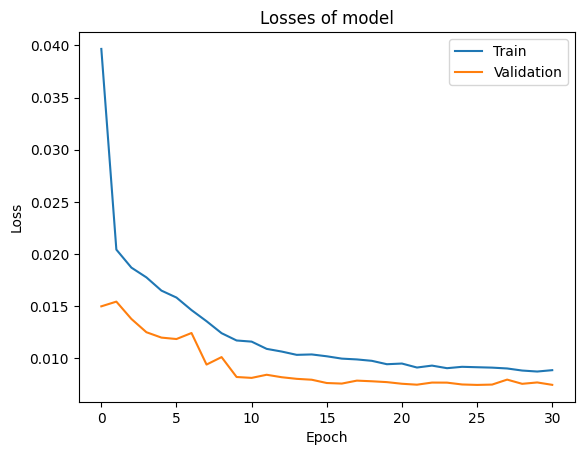

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Losses of model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error as MAE , mean_squared_error as MSE , mean_absolute_percentage_error as MAPE

predictions = best_model.predict(sequences_test)

print(f"MSE : {MSE(predictions,labels_test)}")
print(f"MAE : {MAE(predictions,labels_test)}")
print(f"MAPE : {MAPE(predictions,labels_test)}")

47/47 [==============================] - 1s 3ms/step
MSE : 0.007004605289599715
MAE : 0.06269860701618839
MAPE : 0.1295589108840514


In [42]:
# from (-1,1) --> (-1,9) by duplicating the temperatures for the 9 features
dupli_labels = np.repeat(labels_test.reshape(-1,1) , sequences_test.shape[-1] , axis=1)
# the original temperatures (not normalized)
truth_temp = mm_scaler.inverse_transform(dupli_labels)[:,target_indice]


dupli_predictions = np.repeat(predictions,9,axis=-1)
predicted_temp = mm_scaler.inverse_transform(dupli_predictions)[:,target_indice]

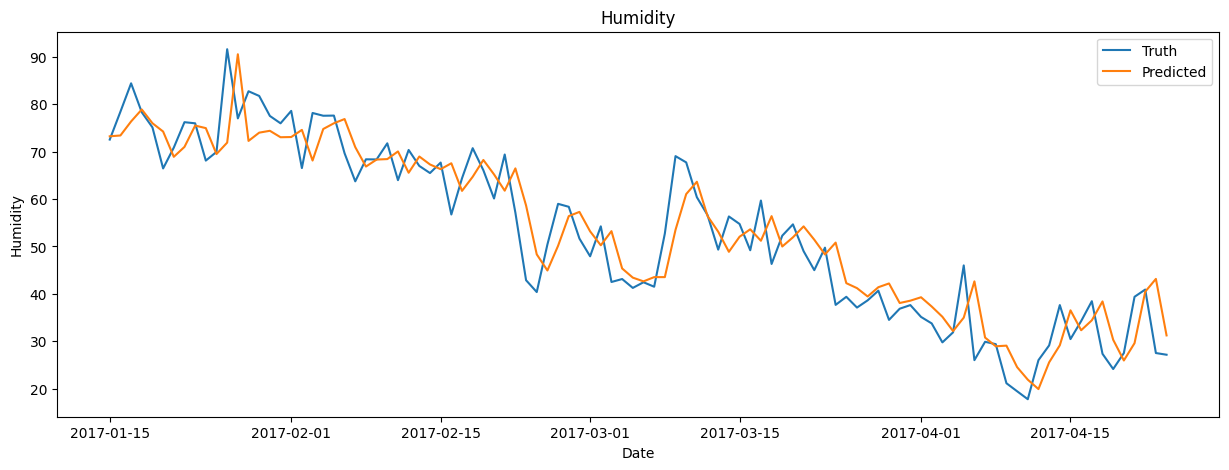

In [43]:
plt.figure(figsize=(15,5))
plt.plot(dates[-100:],truth_temp[-100:],label="Truth")
plt.plot(dates[-100:],predicted_temp[-100:],label="Predicted")
plt.title("Humidity")
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.legend()
plt.show()